<a href="https://colab.research.google.com/github/Shivabhatt/HouseHold_Power_Consumption_forecasting/blob/master/Household_power_consumption_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv('/content/household_power_consumption.txt', sep=';', 
                 parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['NaN','?'], index_col='date_time')

In [3]:
data.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [4]:
data.shape

(2075259, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [0]:
data.isnull()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,False,False,False,False,False,False,False
2006-12-16 17:25:00,False,False,False,False,False,False,False
2006-12-16 17:26:00,False,False,False,False,False,False,False
2006-12-16 17:27:00,False,False,False,False,False,False,False
2006-12-16 17:28:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,False,False,False,False,False,False,False
2010-11-26 20:59:00,False,False,False,False,False,False,False
2010-11-26 21:00:00,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [0]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if np.isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]# fill missing
fill_missing(data.values)

In [16]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Resample data in  daily**

In [18]:
daily_groups = data.resample('D')
daily_data = daily_groups.sum()
print(daily_data.shape)

(1442, 7)


In [19]:
print(daily_data.head())

            Global_active_power  ...  Sub_metering_3
date_time                        ...                
2006-12-16             1209.176  ...          4926.0
2006-12-17             3390.460  ...         13341.0
2006-12-18             2203.826  ...         14018.0
2006-12-19             1666.194  ...          6197.0
2006-12-20             2225.748  ...         14063.0

[5 rows x 7 columns]


In [0]:
X_daily=daily_data.drop('Global_active_power',axis=1)
y_daily=daily_data['Global_active_power']

In [21]:
print(X_daily.shape)
print(X_daily.head())

(1442, 6)
            Global_reactive_power    Voltage  ...  Sub_metering_2  Sub_metering_3
date_time                                     ...                                
2006-12-16                 34.922   93552.53  ...           546.0          4926.0
2006-12-17                226.006  345725.32  ...          4187.0         13341.0
2006-12-18                161.792  347373.64  ...          2621.0         14018.0
2006-12-19                150.942  348479.01  ...          7602.0          6197.0
2006-12-20                160.998  348923.61  ...          2648.0         14063.0

[5 rows x 6 columns]


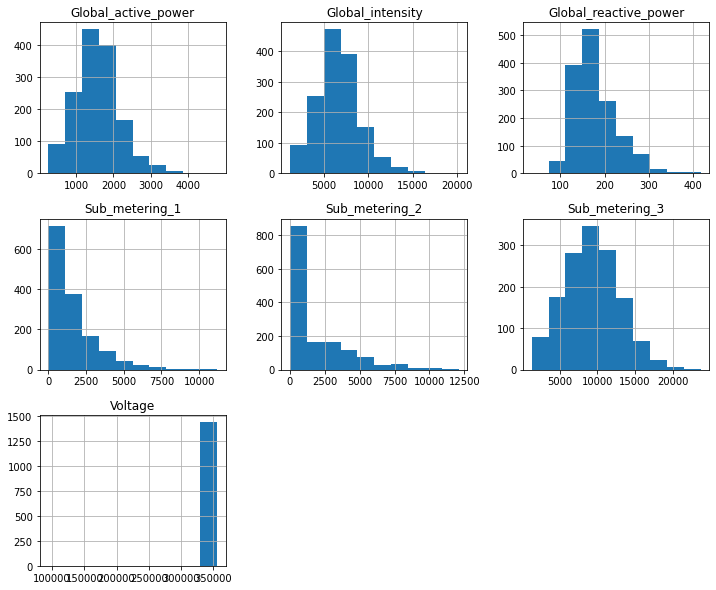

In [22]:
daily_data.hist(figsize=(12,10))
plt.show()

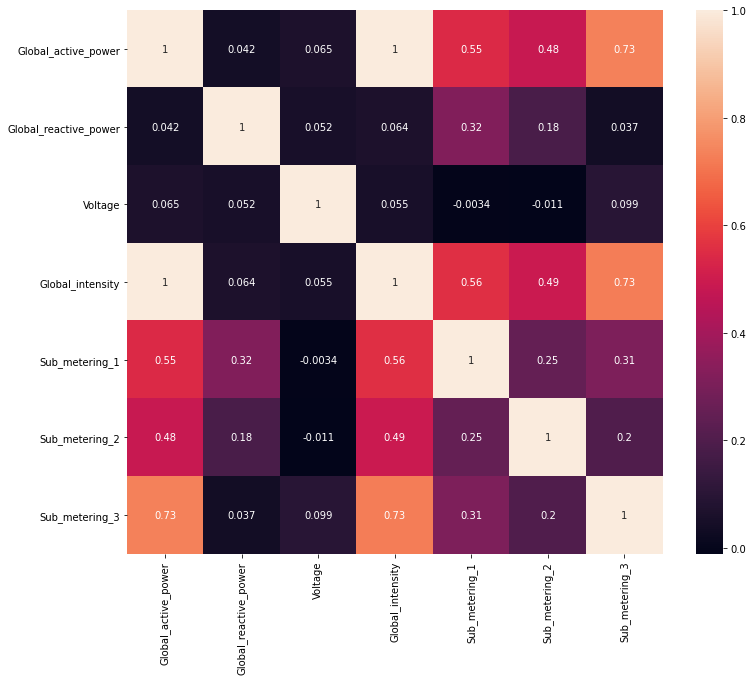

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(daily_data.corr(),annot=True)
plt.show()

**Resample data Weekly**

In [25]:
week_data = data.resample('W').sum()
week_data.shape

(207, 7)

In [0]:
X_week=week_data[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y_week=week_data['Global_active_power']

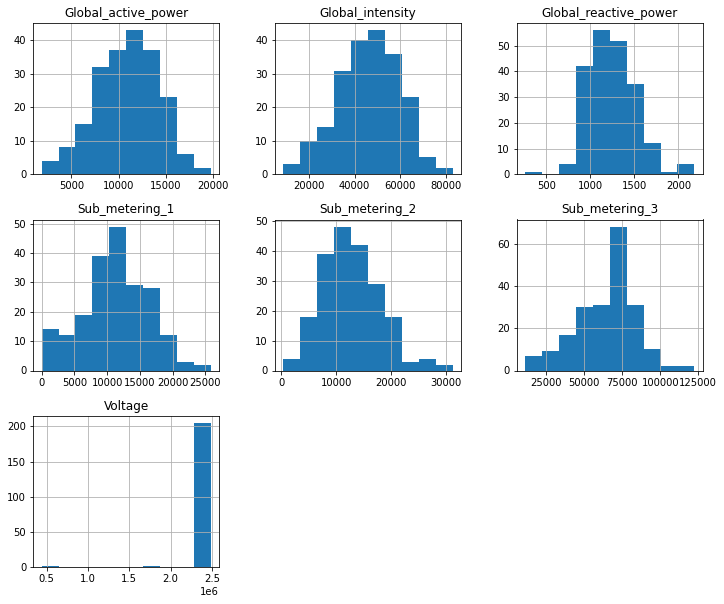

In [27]:
week_data.hist(figsize=(12,10))
plt.show()

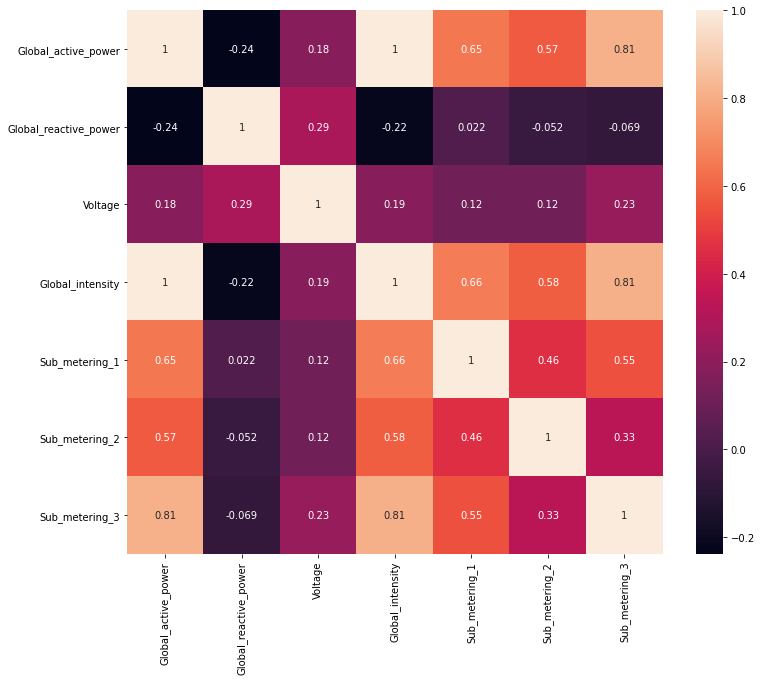

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(week_data.corr(),annot=True)
plt.show()

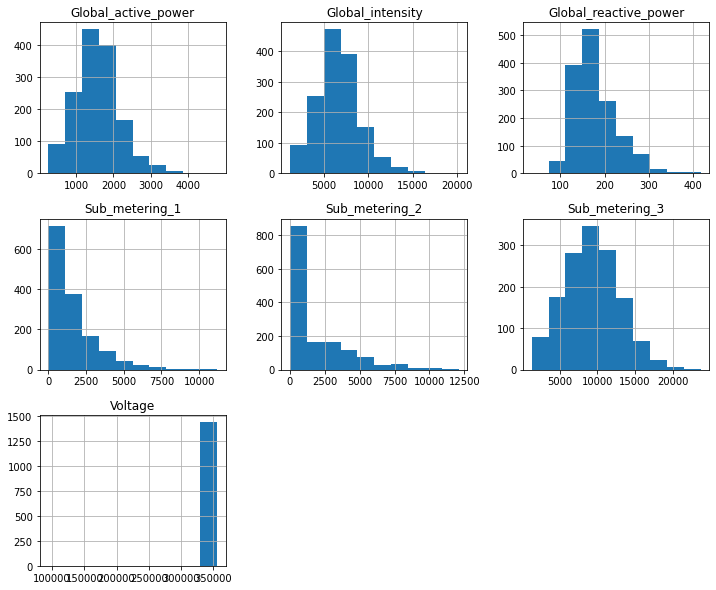

In [29]:
daily_data.hist(figsize=(12,10))
plt.show()

**Resample data Monthly**

In [59]:
month_data = data.resample('M').sum()
month_data.shape

(48, 8)

In [0]:
X_month=month_data[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y_month=month_data['Global_active_power']

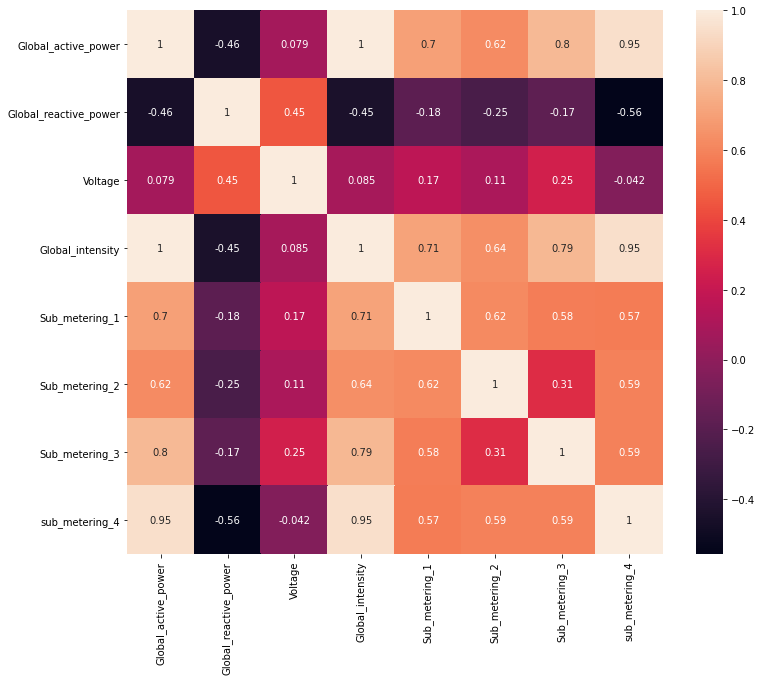

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(month_data.corr(),annot=True)
plt.show()

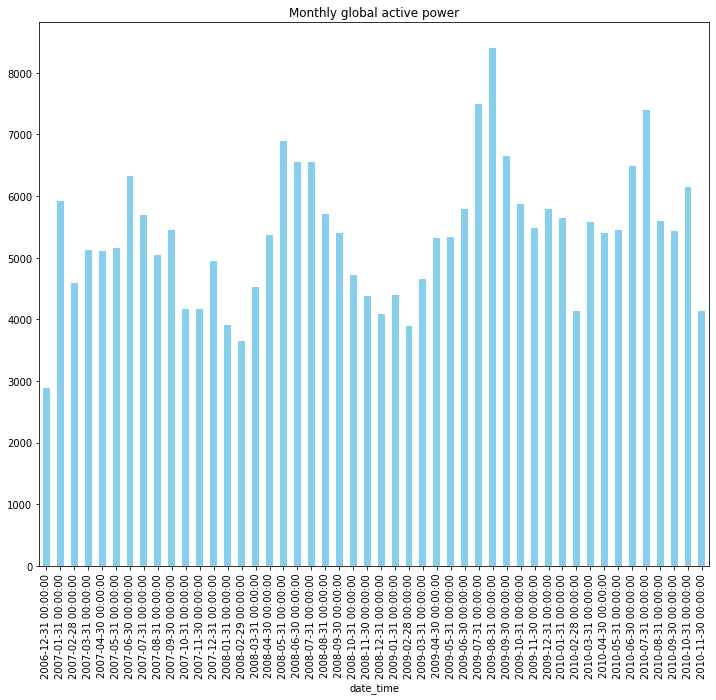

In [62]:
plt.figure(figsize=(12,10))
plt.title('Monthly global active power')
month_data['Global_reactive_power'].plot(kind = 'bar', color = 'skyblue')

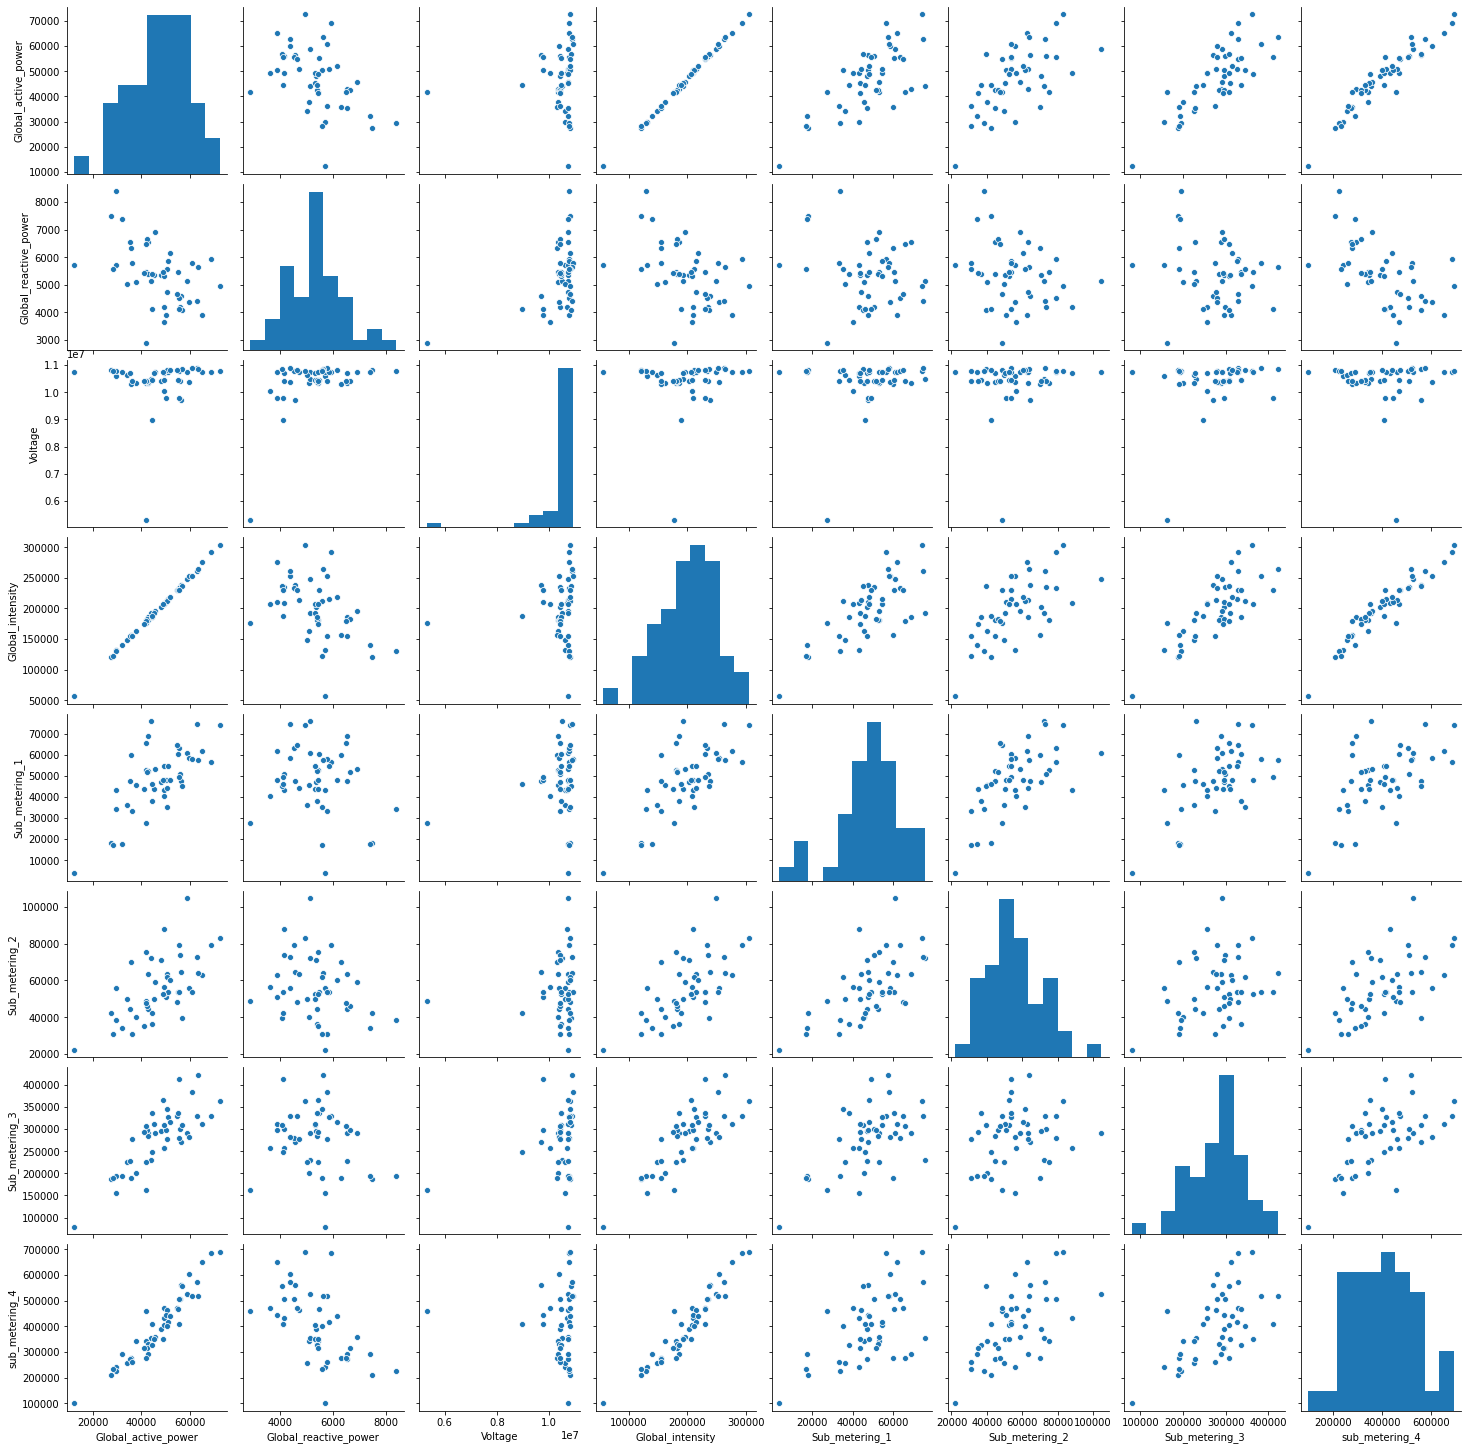

In [63]:
sns.pairplot(month_data)

In [73]:
month_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
date_time,,,,,,,,
2006-12-31,41826.752,2889.918,5310732.96,176651.0,27460.0,48783.0,163022.0,457847.533333
2007-01-31,69014.872,5922.628,10754002.42,292253.6,56433.0,79275.0,329596.0,684943.866667
2007-02-28,56493.764,4582.114,9697748.75,238483.6,47586.0,64607.0,270310.0,559059.733333
2007-03-31,58864.472,5122.336,10736517.85,248781.8,60769.0,104762.0,290378.0,525165.533333
2007-04-30,37780.074,5102.864,10326368.94,162377.2,45622.0,39878.0,201183.0,342984.900000


**Split data into training and testing set**

In [0]:
# resample data to monthly
month_data = dataset.resample('M').mean()
month_data.shape
X_month=month_data[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y_month=month_data['Global_active_power']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X);

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_month, y_month, test_size=0.5,  random_state=42)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred  =svr.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', svr.score(X_train, y_train))
print('Testing score: ', svr.score(X_test, y_test))

Mean Squared Error:  0.06071351787345227
Training Score:  0.017056448214672892
Testing score:  0.021189402169078386


In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred))
print('Training Score: ',knn.score(X_train,y_train))
print('Testing score: ',knn.score(X_test,y_test))

Mean Squared Error:  0.010448484511754475
Training Score:  0.8397091949575453
Testing score:  0.8315517247296677


In [81]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2, min_samples_leaf=4)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', dtr.score(X_train, y_train))
print('Testing score: ', dtr.score(X_test, y_test))

Mean Squared Error:  0.016415465886237223
Training Score:  0.859569318383951
Testing score:  0.7353533028464699


In [82]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test , y_pred))
print('Testing score: ',linreg.score(X_test,y_test))
print('Training Score: ',linreg.score(X_train,y_train))

Mean Squared Error: 2.2100623093382495e-05
Testing score:  0.9996436983910642
Training Score:  0.9998940892593389
